# Introduction to Neural Networks and Deep Learning

## What's the difference between Artificial Intelligence, Machine Learning and Deep Learning?

**Artificial Intelligence** (AI) is a very old field of research. It started in the 1950s; at that time, the pioneers in AI were convinced that they could make machines think. The initial approach was attempting to model intellectual tasks, and program those tasks in computers. That is, in the beginning, AI was about people *hard-coding* problems that the machine tried to solve. A good example of an early AI program is computer chess. Early AI computer chess programs had **lots of rules pre-conceived by the program designers**. So although the term refers to "intelligence", these programs were not "intelligent", but just a sophisticated set of rules.

* The term *neural network* was also born at that time. The initial idea was trying to mimic how a *neuron* works (or in fact, how it was thought a neuron worked when the term was coined) in the brain. As in the case of *Artificial Intelligence*, please do not be fooled by the terms. A *neural network* is just a way to compute approximation to functions. A powerful and useful way, true. But it is not any kind of "artificial brain", or anything like that.

This approach is now obsolete. We now know that some tasks are so complex, that we will never be able to pre-design a system to have a good performance on those tasks. Take the example of the game of Go. Any program designed by humans to play Go was dull and could not compete against professional players. The game is so hard that is just impossible for us as humans to conceived a good Go computer player.
* https://en.wikipedia.org/wiki/Go_(game)

The modern approach to solve this kind of problems involves the use of data. This is what the *learning* part of *Deep Learning* (and *Machine Learning*) refers to. **Learning from data**. So, with this brief introduction, we can say that *Artificial Intelligence* is a broad concept that includes *Machine Learning*, that includes *Deep Learning*. *Artificial Intelligence* does not necessarily means learning from data, but Machine Learning does. And *Deep Learning* is just doing *Machine Learning* with neural networks.

![](../imgs/01_ai_ml_dl.png)

We will see during this course what *learning* means, and what is a *neural network*. 

In the case of the game of Go, all attempts to design a good Go computer player failed, until Google DeepMind created AlphaGo, a system that *learned* to play Go based on data from previous games. AlphaGo is an example that learning from data can provide computer systems that are superior to any system pre-conceived by humans.
* Find out more about AlphaGo by watching this utterly interesting movie: https://www.alphagomovie.com/

In this course, we will give our first steps on *Deep Learning* and *Neural Networks*, to start creating systems that perform complex tasks by learning from data. Instead of attempting to derive the rules by ourselves, those rules will be inferred by a neural network based on the data we provide:

![](../imgs/02_rules_data.png)

## Neural Networks

A neural network is just a stacked set of layers. Each layer is represented by a tensor, and it performs an affine transformation on each one of the layers.
* A matrix is a 2D tensor
* Affine transformation $\vec{y} = W\cdot\vec{x} + \vec{b}$, where $W$ is the weights tensor, $\vec{x}$ is the input data, $\vec{y}$ is the output data and $\vec{b}$ is called the bias
* $W$ and $\vec{b}$ are model parameters that need to be found by training

![](../imgs/05_nn.png)

Note that this is a **linear operation**, therefore the result will be linear too. But the functions we want to learn are normally non-linear. How do we overcome this limiation? By using an **activation function**, that transforms the result from the linear operation. So, we actually do the following operation:

$\vec{y} = f\left(W\cdot\vec{x} + \vec{b}\right)$

There are several common activation functions, depending on the characteristics of the data and the kind of problem we want to solve. Here we will use the probably most often used activation function: **rectified linear unit**, or **relu** for friends:

![Relu plot](https://upload.wikimedia.org/wikipedia/commons/6/6c/Rectifier_and_softplus_functions.svg)

(image extracted from https://en.wikipedia.org/wiki/Rectifier_(neural_networks))

Relu will add the non-linearity that we need to learn arbitrary functions.

We can achieve the same with many other activation functions. See the documentation of Keras for details on the available activation functions:
 - https://keras.io/activations/


Each layer learns a new representation of the input data, and after several layers, the representation will make it straightforward to solve the task (e.g. assiging a digit to an image of a digit).

Until very recently, any attempt to train a deep neural network would not provide good results. Recent progresses (e.g. advances in hardware, new activation functions) make it possible to train very deep network, and therefore, solve problems that were unfeasible not long ago.

### Training process

The parameters of the network are initially randomly assigned. Then after each pass of the network, that is, after each *epoch*, the predictions of the network is compared against the true values, applying a *loss function*. This score is used to update the parameters of the network, with a process called **backpropagation**.
* Backpropagation is a complex process that involves calculating the gradient of the parameters of the network. For more details see: https://en.wikipedia.org/wiki/Backpropagation
* See also this excellent and visual explanation of how backpropagation works: https://google-developers.appspot.com/machine-learning/crash-course/backprop-scroll/

The training process is just an optimization process, that is normally done using a gradient descent-based algorithm. The values of gradients are computed using the backpropagation algorithm. Each epoch will make the loss score to be lower, and the predictions to be better.

![](../imgs/06_optim.png)

In practice, we have to fine tune the number of epochs (and other parameters), until we obtain a result that is good enough for our purpose. In fact, if the number of epochs is too high, our model may **overfit** the training data. In that case, it will perform worsely when the model is exposed to data that it  has not seen previously.
* Fine tuning the number of epochs, and other parameters (e.g. the number and shape of the layers) is known as **hyperparameters optimization**, or **hyperparameters tuning**
* The parameters of the model are the $W$ and $b$ values of each layer, and those are determined by training.

## Hyperparameters tuning

In summary, when we are trying to obtain a deep learning model, the process that we will follow is:
* Decide on the architecture of the network (number of layers, type of each layer, size of each layer)
* Decide on the activation functions on each layer
* Decide on the parameters related to the optimization process (e.g. learning rate)
* Decide on the loss function that we will use
* Decide on the metrics that we will use to evaluate the performance of the model
* Decide on the training parameters (number of epochs, batch size)
* Decide on how to split the data between training, validation and test sets.

We obtain feedback for those decisions with the results of the training applied to the validation set. We train once, change some of the hyperparameters, train again, decide if that's better, and we keep going until we have found a model that is satisfactory enough for our purposes.

After that, we finally evaluate the model on the test set.

## Our first neural network

Let's start with an easy example. We are going to produce some synthetic data, and will try to predict the function that generates the data. We will add some noise, to make the problem more difficult.

The function we are going to try to predict is

$\displaystyle y = 3*x + 2$

In [1]:
# Here goes the fun =)
%pylab inline
plt.style.use('seaborn-talk')


Populating the interactive namespace from numpy and matplotlib


In [2]:
x_train =np.linspace(0,100,5000)
y_train = 3*x_train + 2

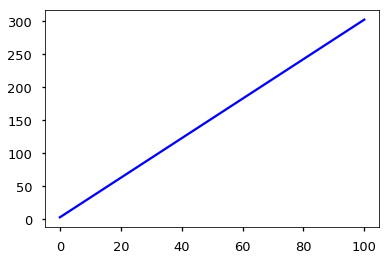

In [3]:
plt.plot(x_train, y_train, 'b')
plt.show()

In [4]:
import keras

Using TensorFlow backend.


In [5]:
from keras import models
from keras import layers

In [8]:
# inicializamos el modelo en modo secuencial (capa a capa). Las capas han de tener dimensión coherente
m = models.Sequential()
# definimos la primera capa de la red
m.add(layers.Dense(8, input_shape = (1,), activation = 'elu' ))
m.add(layers.Dense(8, activation = 'elu'))
m.add(layers.Dense(8, activation = 'elu'))
m.add(layers.Dense(8, activation = 'elu'))
m.add(layers.Dense(8, activation = 'elu'))
#m.add(layers.Dense(16, activation = 'elu'))
# otra  capa (solo hay que poner la salida)
m.add(layers.Dense(1, activation = 'elu'))

In [9]:
# la segunda capa tiene 17 params debido al termino independiente
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras import optimizers
from keras  import losses
from keras import metrics

In [11]:
m.compile(optimizer=optimizers.rmsprop(), 
          loss= losses.mean_squared_error)

In [12]:
# Stochastic Gradient descent --> mini batch size para calcular el gradiente
# epoch -> cada vez que pasamos todos los datos disponibles por el stochastic gd. Ej. 10k datos y batch_size = 10 --> 1 epoch = 1000 iteraciones
h = m.fit(x_train, y_train, batch_size = 50, epochs=25, validation_split=0.2)

Train on 4000 samples, validate on 1000 samples
Epoch 1/25
4000/4000 [==============================] - 1s 151us/step - loss: 11718.4068 - val_loss: 18633.5870
Epoch 2/25
4000/4000 [==============================] - 0s 24us/step - loss: 880.0918 - val_loss: 148.8290
Epoch 3/25
4000/4000 [==============================] - 0s 23us/step - loss: 21.3930 - val_loss: 37.5931
Epoch 4/25
4000/4000 [==============================] - 0s 22us/step - loss: 2.7224 - val_loss: 30.3190
Epoch 5/25
4000/4000 [==============================] - 0s 25us/step - loss: 2.2203 - val_loss: 14.6240
Epoch 6/25
4000/4000 [==============================] - 0s 28us/step - loss: 1.9964 - val_loss: 28.5811
Epoch 7/25
4000/4000 [==============================] - 0s 26us/step - loss: 1.9274 - val_loss: 20.5873
Epoch 8/25
4000/4000 [==============================] - 0s 27us/step - loss: 1.9199 - val_loss: 22.7653
Epoch 9/25
4000/4000 [==============================] - 0s 25us/step - loss: 1.9207 - val_loss: 0.2872
Epoch

In [15]:
def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()

    plt.show()  

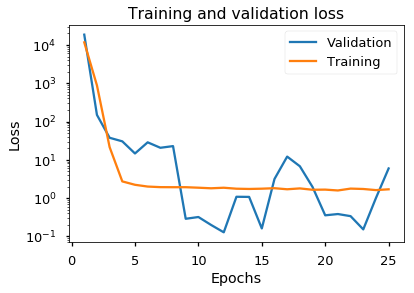

In [16]:
plot_metric(h,'loss')

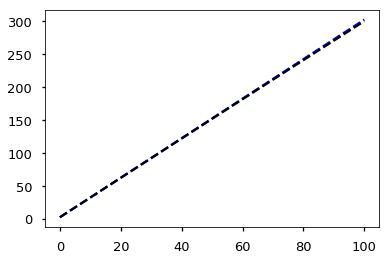

In [124]:
pred = m.predict(x_train)
plt.plot(x_train, y_train, '--b')
plt.plot(x_train, pred, '--k')

In [125]:
x_test = np.linspace(100, 105, 100)
y_test = 3*x_test +2

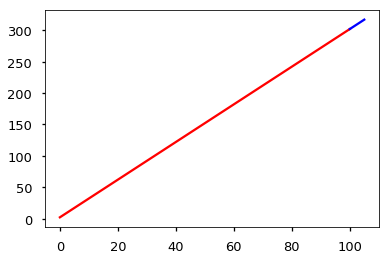

In [126]:
plt.plot(x_train, y_train, 'r')
plt.plot(x_test, y_test, 'b')

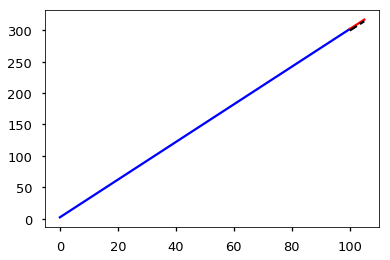

In [127]:
pred = m.predict(x_test)
plt.plot(x_train, y_train, 'b')
plt.plot(x_test, y_test, 'r')
plt.plot(x_test, pred, '--k')

**Examples with other functions**

In [145]:
# Modelo real: parabola
# añadimos error ~ N(0,e) a la fun generadora de datos
#f = lambda x,e: 2*x**2 + x + numpy.random.normal(x,e)
#x_train = linspace(-100,100,1000)
#y_perf = f(x_train,0)
#y_train = f(x_train,3000)

f = lambda x,e: 2*x**3 + x + numpy.random.normal(x,e)

x_train = linspace(-100,100,1000)
y_perf = f(x_train,0)
y_train = f(x_train,150000)

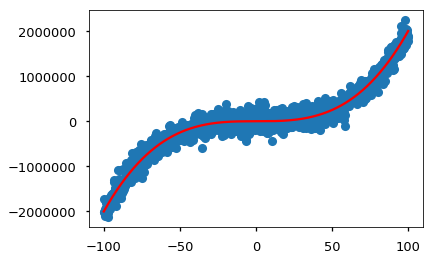

In [147]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, y_perf, color = 'red')


In [184]:
m = models.Sequential()
m.add(layers.Dense(64, input_shape = (1,), activation = 'relu'))
m.add(layers.Dense(32, activation = 'relu'))
m.add(layers.Dense(32, activation = 'relu'))
m.add(layers.Dense(1))

# m.add(layers.Dense(100, input_shape=(1,), activation='tanh'))
# m.add(layers.Dense(90, activation='tanh'))
# m.add(layers.BatchNormalization())
# m.add(layers.Dense(80, activation='tanh'))
# m.add(layers.BatchNormalization())
# m.add(layers.Dense(70, activation='tanh'))
# m.add(layers.Dropout(0.2))
# m.add(layers.Dense(60, activation='tanh'))
# m.add(layers.BatchNormalization())
# m.add(layers.Dense(50, activation='tanh'))
# m.add(layers.Dropout(0.2))
# m.add(layers.Dense(40, activation='tanh'))
# m.add(layers.BatchNormalization())
# m.add(layers.Dense(30, activation='tanh'))
# m.add(layers.Dense(20, activation='tanh'))
# m.add(layers.BatchNormalization())
# m.add(layers.Dense(10, activation='tanh'))
# m.add(layers.BatchNormalization())
# m.add(layers.Dense(5, activation='tanh'))
# m.add(layers.Dense(1, activation='tanh'))


In [185]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_54 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_55 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 33        
Total params: 3,297
Trainable params: 3,297
Non-trainable params: 0
_________________________________________________________________


In [186]:
m.compile(optimizer=optimizers.rmsprop(), loss=losses.mean_squared_error)

In [187]:
#normalization
x_train_norm = (x_train-x_train.mean())/(x_train.std())
y_train_norm = (y_train-y_train.mean())/(y_train.std())

h = m.fit(x_train_norm, y_train_norm, batch_size = 128, epochs = 30, validation_split = 0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/30
800/800 [==============================] - 1s 943us/step - loss: 0.4838 - val_loss: 2.0929
Epoch 2/30
800/800 [==============================] - 0s 37us/step - loss: 0.2948 - val_loss: 1.8233
Epoch 3/30
800/800 [==============================] - 0s 33us/step - loss: 0.2051 - val_loss: 1.5691
Epoch 4/30
800/800 [==============================] - 0s 34us/step - loss: 0.1669 - val_loss: 1.3492
Epoch 5/30
800/800 [==============================] - 0s 28us/step - loss: 0.1453 - val_loss: 1.3470
Epoch 6/30
800/800 [==============================] - 0s 28us/step - loss: 0.1255 - val_loss: 1.3690
Epoch 7/30
800/800 [==============================] - 0s 24us/step - loss: 0.1102 - val_loss: 1.4978
Epoch 8/30
800/800 [==============================] - 0s 31us/step - loss: 0.0978 - val_loss: 1.2883
Epoch 9/30
800/800 [==============================] - 0s 30us/step - loss: 0.0866 - val_loss: 1.4062
Epoch 10/30
800/800 [=======================

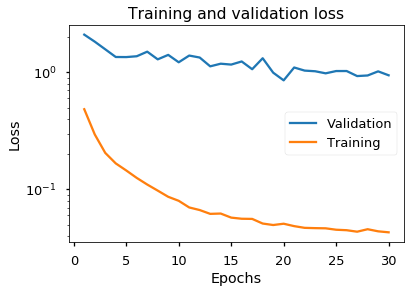

In [188]:
plot_metric(h,'loss')

In [189]:
y_fitted_norm = m.predict(x_train_norm)
y_fitted = y_fitted_norm * y_train.std() + y_train.mean()

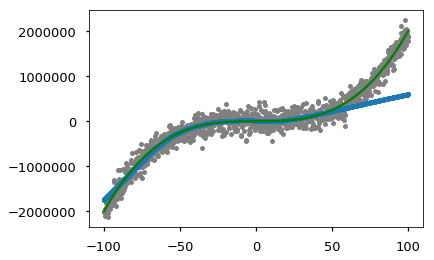

In [190]:
plt.plot(x_train, y_train, 'o', color='gray', markersize=5)
plt.plot(x_train, y_fitted, 'o', markersize=5)
plt.plot(x_train, y_perf, 'g')

In [191]:
x_test = linspace(-150,-101,50)
x_test_norm = (x_test - x_train.mean())/x_train.std()
y_test_norm = m.predict(x_test_norm)
y_test = y_test_norm * y_train.std() + y_train.mean()

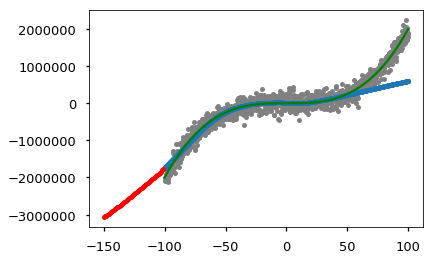

In [192]:
plt.plot(x_train, y_train, 'o', color='gray', markersize=5)
plt.plot(x_train, y_fitted, 'o', markersize=5)
plt.plot(x_train, y_perf, 'g')
plt.plot(x_test, y_test, 'o', color = 'red', markersize=5)

In [193]:
x_test_norm

array([-2.59547943, -2.57817624, -2.56087304, -2.54356984, -2.52626665,
       -2.50896345, -2.49166026, -2.47435706, -2.45705386, -2.43975067,
       -2.42244747, -2.40514427, -2.38784108, -2.37053788, -2.35323469,
       -2.33593149, -2.31862829, -2.3013251 , -2.2840219 , -2.2667187 ,
       -2.24941551, -2.23211231, -2.21480912, -2.19750592, -2.18020272,
       -2.16289953, -2.14559633, -2.12829313, -2.11098994, -2.09368674,
       -2.07638355, -2.05908035, -2.04177715, -2.02447396, -2.00717076,
       -1.98986757, -1.97256437, -1.95526117, -1.93795798, -1.92065478,
       -1.90335158, -1.88604839, -1.86874519, -1.851442  , -1.8341388 ,
       -1.8168356 , -1.79953241, -1.78222921, -1.76492601, -1.74762282])